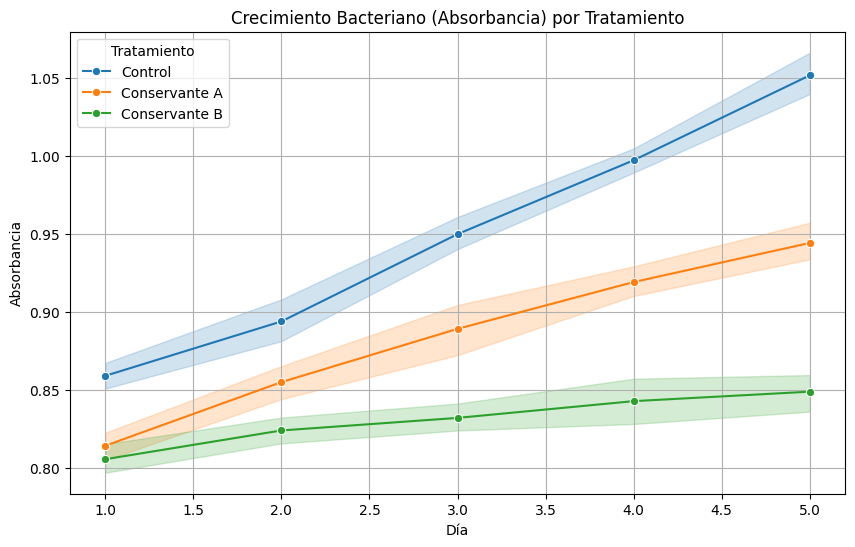

In [1]:
# 📦 Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 🔧 Simulación de datos
np.random.seed(42)
dias = [1, 2, 3, 4, 5]
tratamientos = ['Control', 'Conservante A', 'Conservante B']
n = 10  # repeticiones por grupo y día

data = []

for dia in dias:
    for tratamiento in tratamientos:
        if tratamiento == 'Control':
            base = 0.8 + dia * 0.05  # más crecimiento
        elif tratamiento == 'Conservante A':
            base = 0.8 + dia * 0.03
        else:  # Conservante B
            base = 0.8 + dia * 0.01  # menos crecimiento
        absorbancias = np.random.normal(loc=base, scale=0.02, size=n)
        for abs_val in absorbancias:
            data.append([dia, tratamiento, abs_val])

df = pd.DataFrame(data, columns=['Día', 'Tratamiento', 'Absorbancia'])

# 📊 Visualizar evolución
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Día', y='Absorbancia', hue='Tratamiento', marker='o')
plt.title('Crecimiento Bacteriano (Absorbancia) por Tratamiento')
plt.grid(True)
plt.show()


In [2]:
# 🔍 Evaluar ANOVA y Tukey por cada día
for dia in dias:
    print(f"\n📅 Día {dia}:")

    df_dia = df[df['Día'] == dia]
    modelo = ols('Absorbancia ~ C(Tratamiento)', data=df_dia).fit()
    anova = sm.stats.anova_lm(modelo, typ=2)
    print("\nANOVA:")
    print(anova)

    # ✅ Si p < 0.05, hacer Tukey
    if anova['PR(>F)'][0] < 0.05:
        tukey = pairwise_tukeyhsd(df_dia['Absorbancia'], df_dia['Tratamiento'])
        print("\nTukey HSD:")
        print(tukey)
    else:
        print("No hay diferencias significativas entre tratamientos.")



📅 Día 1:

ANOVA:
                  sum_sq    df          F        PR(>F)
C(Tratamiento)  0.016435   2.0  35.103586  3.086623e-08
Residual        0.006320  27.0        NaN           NaN


/tmp/ipython-input-3555145202.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova['PR(>F)'][0] < 0.05:



Tukey HSD:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
Conservante A Conservante B  -0.0086 0.4292 -0.0256 0.0083  False
Conservante A       Control   0.0448    0.0  0.0278 0.0617   True
Conservante B       Control   0.0534    0.0  0.0364 0.0704   True
-----------------------------------------------------------------

📅 Día 2:

ANOVA:
                  sum_sq    df          F        PR(>F)
C(Tratamiento)  0.024471   2.0  35.019576  3.159559e-08
Residual        0.009433  27.0        NaN           NaN


/tmp/ipython-input-3555145202.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova['PR(>F)'][0] < 0.05:



Tukey HSD:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
Conservante A Conservante B   -0.031 0.0027 -0.0517 -0.0102   True
Conservante A       Control   0.0389 0.0002  0.0181  0.0596   True
Conservante B       Control   0.0698    0.0  0.0491  0.0905   True
------------------------------------------------------------------

📅 Día 3:

ANOVA:
                  sum_sq    df          F        PR(>F)
C(Tratamiento)  0.069253   2.0  82.258773  3.262835e-12
Residual        0.011366  27.0        NaN           NaN


/tmp/ipython-input-3555145202.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova['PR(>F)'][0] < 0.05:



Tukey HSD:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
Conservante A Conservante B   -0.057   0.0 -0.0798 -0.0343   True
Conservante A       Control   0.0607   0.0  0.0379  0.0834   True
Conservante B       Control   0.1177   0.0  0.0949  0.1404   True
-----------------------------------------------------------------

📅 Día 4:

ANOVA:
                  sum_sq    df           F        PR(>F)
C(Tratamiento)  0.118984   2.0  170.678029  4.773042e-16
Residual        0.009411  27.0         NaN           NaN


/tmp/ipython-input-3555145202.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova['PR(>F)'][0] < 0.05:



Tukey HSD:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj lower   upper  reject
----------------------------------------------------------------
Conservante A Conservante B  -0.0763   0.0 -0.097 -0.0556   True
Conservante A       Control    0.078   0.0 0.0573  0.0987   True
Conservante B       Control   0.1543   0.0 0.1336   0.175   True
----------------------------------------------------------------

📅 Día 5:

ANOVA:
                  sum_sq    df           F        PR(>F)
C(Tratamiento)  0.205413   2.0  233.206612  9.227100e-18
Residual        0.011891  27.0         NaN           NaN


/tmp/ipython-input-3555145202.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova['PR(>F)'][0] < 0.05:



Tukey HSD:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower  upper  reject
----------------------------------------------------------------
Conservante A Conservante B  -0.0952   0.0 -0.1185 -0.072   True
Conservante A       Control   0.1073   0.0  0.0841 0.1306   True
Conservante B       Control   0.2026   0.0  0.1793 0.2258   True
----------------------------------------------------------------
